In [18]:
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('Mall_Customers 2.csv')

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.shape

(200, 5)

In [11]:
#getting some information from dataset
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [12]:
#checking missing value in dataset
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
X = df.iloc[:,[3,4]].values

In [15]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Choosing the number of cluster 
### WCSS ->Within cluster sum of squares

In [23]:
#finding wcss value for different number of cluster
wcss = []
for i in range(1,11):
    Kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
    Kmeans.fit(X)

    wcss.append(Kmeans.inertia_)

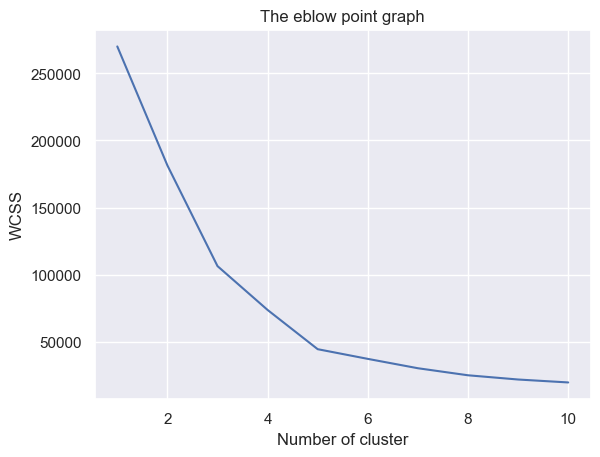

In [24]:
#Plot the elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The eblow point graph')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()


#### Optimum number of cluster should be 5

In [28]:
Kmean = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
#return a label for each data point based on their cluster
Y = Kmean.fit_predict(X)
print(Y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


### 5 cluster 0,1,2,3,4,

### Visualizing all the clusters

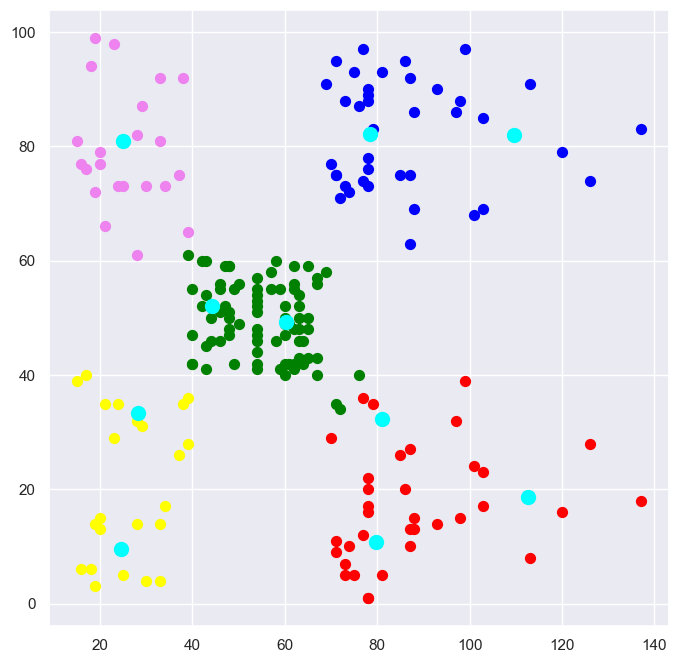

In [36]:
# Plot all the cluster and their centroids
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50,  c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50,  c='red', label='Cluster 1')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50,  c='yellow', label='Cluster 1')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50,  c='violet', label='Cluster 1')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50,  c='blue', label='Cluster 1')

#Plot the centroid
plt.scatter(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:,1], s=100, c='cyan', label='centroids')
plt.title('Customer Group')
plt.Xlabel('A